# Assignment 3

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Packages Used
- Keras [link](https://keras.io/guides/)

## Submission
- Rename the notebook to `<roll_number>_Assignment3_Q1.ipynb`.

## Question 1

This question is based on seminal work by Zhang et al. The paper is titled 'Understanding deep learning requires rethinking generalization'. The paper talks about how the traditional methods fail to explain generalization of neural network. They show that a sufficiently parameterized network can easily fit a random labeling of the training data. This fitting cannot be curbed by explicit regularization.


## Q) 1.1 
Lets take a hello world dataset for ML algorithm the MNIST!
This question requires you to train a convolutional neural network.
Architecture: 4 layers of convolution with 64 filters in each layer. Keep activation map size same using padding.

In [ ]:
from tensorflow import keras   # feel free to use MNIST data from other sources 
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train data shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

Train data shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
x_test[0].shape

(28, 28, 1)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X_train__ = x_train.reshape(x_train.shape[0], 28, 28)

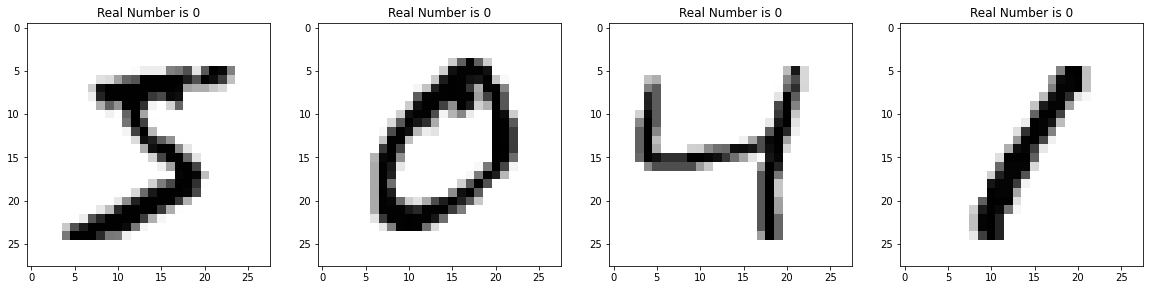

In [ ]:
fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

In [ ]:
X_test__ = x_test.reshape(x_test.shape[0], 28, 28)

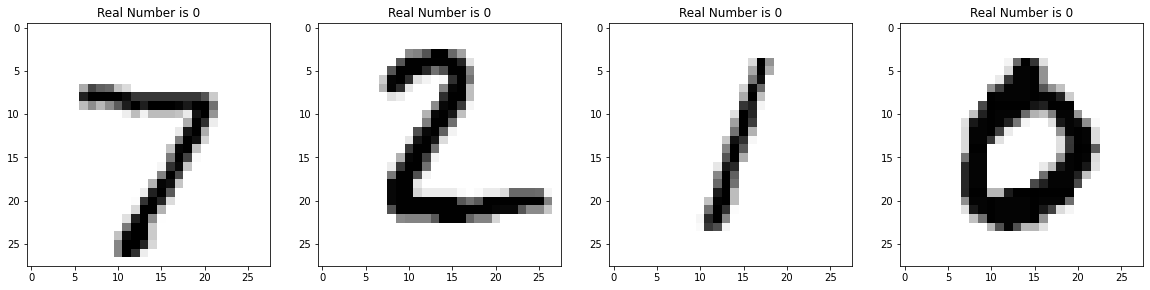

In [ ]:
fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    digit = y_test[i].argmax()
    ax.set(title = f"Real Number is {digit}");

#### One-hot-encode your labels here

In [ ]:
NUM_FILTERS = 64

In [ ]:
print ('label shape: ', np.shape(y_train),np.shape(y_test))
def encode(y):
   return keras.utils.to_categorical(y)

y_train = encode(y_train)
y_test = encode(y_test)
print ('label shape: ',np.shape(y_train),np.shape(y_test))

label shape:  (60000,) (10000,)
label shape:  (60000, 10) (10000, 10)


In [ ]:
y_train[0:4]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#### Define the model mentioned above
    1) Print the number of trainable parameters
     Use sgd optimizer with softmax at last layer 
     Train the model until convergence (use test data only for model selection and early stopping!)
    2) Report the train and test accuracy
    3) Plot the train and test accuracy and loss throughout the training

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(keras.Input(shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=NUM_FILTERS, kernel_size=3, activation="relu", padding="same", ))
model.add(keras.layers.Conv2D(filters=NUM_FILTERS, kernel_size=3, activation="relu", padding="same", ))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
Total params: 37,568
Trainable params: 37,568
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
Total params: 37,568
Trainable params: 37,568
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(keras.layers.Conv2D(filters=NUM_FILTERS, kernel_size=3, activation="relu", padding="same", ))
model.add(keras.layers.Conv2D(filters=NUM_FILTERS, kernel_size=3, activation="relu", padding="same", ))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), padding="same"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
es = keras.callbacks.EarlyStopping(
        monitor="accuracy", # metrics to monitor
        patience=10, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, # 
     )

rp = keras.callbacks.ReduceLROnPlateau(
        monitor="accuracy",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, callbacks=[es, rp], )

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4417 - accuracy: 0.8692 - lr: 0.0100
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0897 - accuracy: 0.9725 - lr: 0.0100
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0659 - accuracy: 0.9797 - lr: 0.0100
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0541 - accuracy: 0.9835 - lr: 0.0100
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0457 - accuracy: 0.9857 - lr: 0.0100
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0405 - accuracy: 0.9873 - lr: 0.0100
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0353 - accuracy: 0.9891 - lr: 0.0100
Epoch 8/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0324 - accuracy: 0.9899 - lr: 0.0100
Epoch 9/10
1875/1875 [==============================] - 22s 12ms

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'lr'])

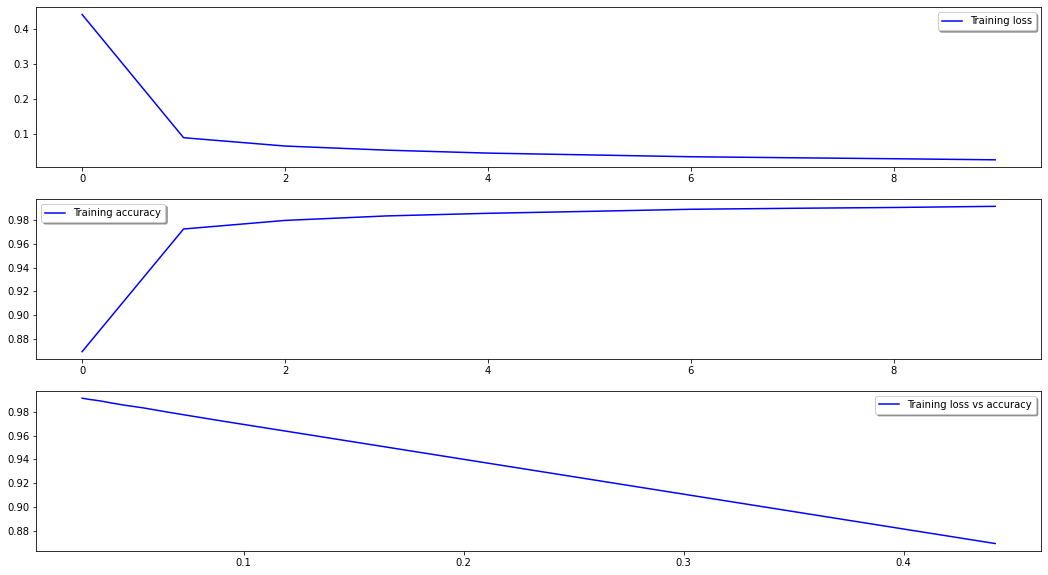

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(3,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
# ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
# ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

ax[2].plot(history.history['loss'], history.history['accuracy'], color='b', label="Training loss vs accuracy")
legend = ax[2].legend(loc='best', shadow=True)

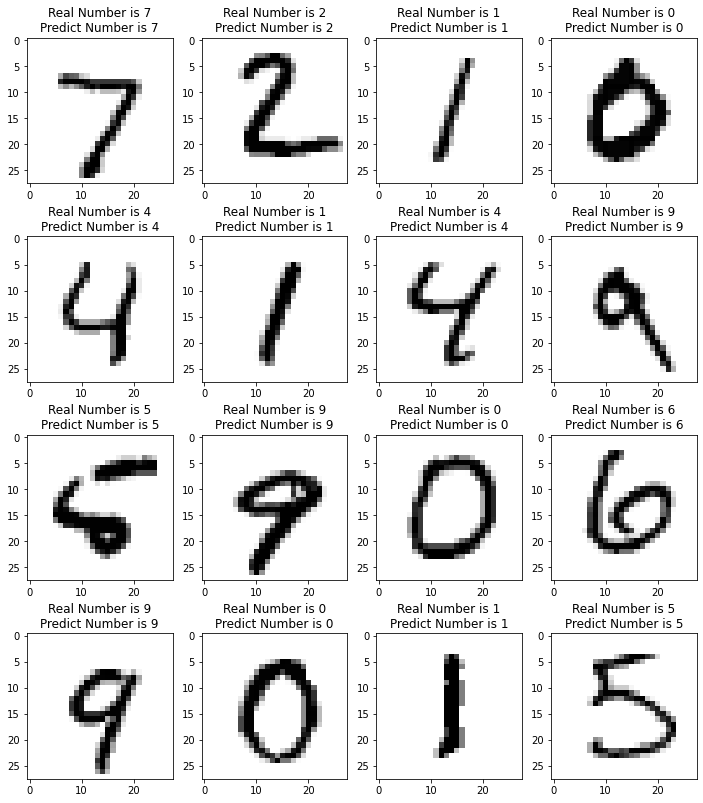

In [ ]:
y_pred = model.predict(x_test)
X_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}")

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

matrix = confusion_matrix(Y_test, Y_pred) # Confusion matrix

In [ ]:
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy is ', acc*100,'%')

Accuracy is  98.99 %


## Q) 1.2
Now lets start adding label noise to the dataset


1) Randomize 20% of train labels and repeat Q1 (1,2 & 3)

2) Randomize 40% of train labels and repeat Q1 (3)

3) Randomize 60% of train labels and repeat Q1 (3)

4) Randomize 80% of train labels and repeat Q1 (3)

5) Randomize 100% of train labels and repeat Q1 (3)


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train data shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

Train data shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
x_train[0].shape

(28, 28, 1)

In [ ]:
import random

In [ ]:
def randomize_data(y, ratio):
    res = []
    cnt = 0
    for yi in y:
        rn = random.random()
        val = yi
        if rn <= ratio:
            val = random.randint(0, 9)
            # print(yi, val)
            cnt += 1
        res.append(val)
    return np.array(res)

In [ ]:
class CNN_Model:
  """
  
  """
  def __init__(self):
    self.model = keras.Sequential()
  
  def addLayers(self, shape):
    self.model.add(keras.Input(shape=shape))
    self.model.add(keras.layers.Conv2D(filters=NUM_FILTERS, kernel_size=3, activation="relu", padding="same", ))
    self.model.add(keras.layers.Conv2D(filters=NUM_FILTERS, kernel_size=3, activation="relu", padding="same", ))
    self.model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
    self.model.summary()
    self.model.add(keras.layers.Conv2D(filters=NUM_FILTERS, kernel_size=3, activation="relu", padding="same", ))
    self.model.add(keras.layers.Conv2D(filters=NUM_FILTERS, kernel_size=3, activation="relu", padding="same", ))
    self.model.add(keras.layers.MaxPool2D(pool_size=(2,2), padding="same"))
    self.model.summary()
    self.model.add(keras.layers.Flatten())
    self.model.add(keras.layers.Dense(10,activation="softmax"))
    self.model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    self.model.summary()
  
  def getCallbacks(self):
    es = keras.callbacks.EarlyStopping(
        monitor="accuracy", # metrics to monitor
        patience=10, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, # 
     )

    rp = keras.callbacks.ReduceLROnPlateau(
            monitor="accuracy",
            factor=0.2,
            patience=3,
            verbose=1,
            mode="max",
            min_lr=0.00001,
        )
    return [es, rp]
  
  def startTraining(self, x_train, y_train, epochs=10):
    self.history = self.model.fit(x_train, y_train, epochs = epochs, callbacks=self.getCallbacks())

  def show_accuracy_loss_graph(self):
    # Plot the loss and accuracy curves for training and validation 
    fig, ax = plt.subplots(3,1, figsize=(18, 10))
    ax[0].plot(self.history.history['loss'], color='b', label="Training loss")
    # ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
    legend = ax[0].legend(loc='best', shadow=True)

    ax[1].plot(self.history.history['accuracy'], color='b', label="Training accuracy")
    # ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
    legend = ax[1].legend(loc='best', shadow=True)

    ax[2].plot(self.history.history['loss'], history.history['accuracy'], color='b', label="Training loss vs accuracy")
    legend = ax[2].legend(loc='best', shadow=True)
  
  def evaluate(self, x_test, y_test):
    return self.model.evaluate(x_test, y_test, verbose=0)

  def getPrediction(self, x_test):
     return self.model.predict(x_test)

In [ ]:
def show_prediction_accuracy(x_test, y_test, y_pred):
  X_test__ = x_test.reshape(x_test.shape[0], 28, 28)

  fig, axis = plt.subplots(4, 4, figsize=(12, 14))
  print('x_test', x_test is None)
  print('y_test', y_test is None)
  print('y_pred', y_pred is None)
  for i, ax in enumerate(axis.flat):
      ax.imshow(X_test__[i], cmap='binary')
      ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}")

In [ ]:
e_y_test = encode(y_test)

In [ ]:
random_ratios = [0.2, 0.4, 0.6, 0.8, 1.0]

In [ ]:
def solve(ratio, result_loss, result_accuracy):
  print('*******************')
  print('For ratio', ratio)
  r_y_train = randomize_data(y_train, ratio)
  e_y_train = encode(r_y_train)
  model = CNN_Model()
  model.addLayers(shape=x_train[0].shape)
  model.startTraining(x_train, e_y_train)
  y_pred = model.getPrediction(x_test)
  output = model.evaluate(x_test, e_y_test)
  result_loss.append(output[0])
  result_accuracy.append(output[1])
  show_prediction_accuracy(x_test, e_y_test, y_pred)
  model.show_accuracy_loss_graph()

  print('******************')

*******************
For ratio 0.2
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_29 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
Total params: 37,568
Trainable params: 37,568
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 28, 28, 64)        640  

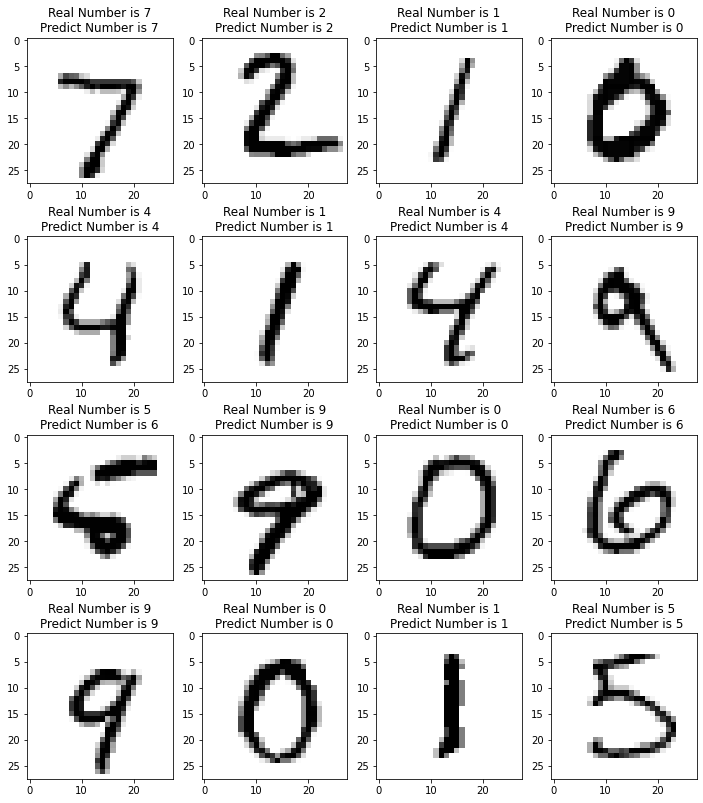

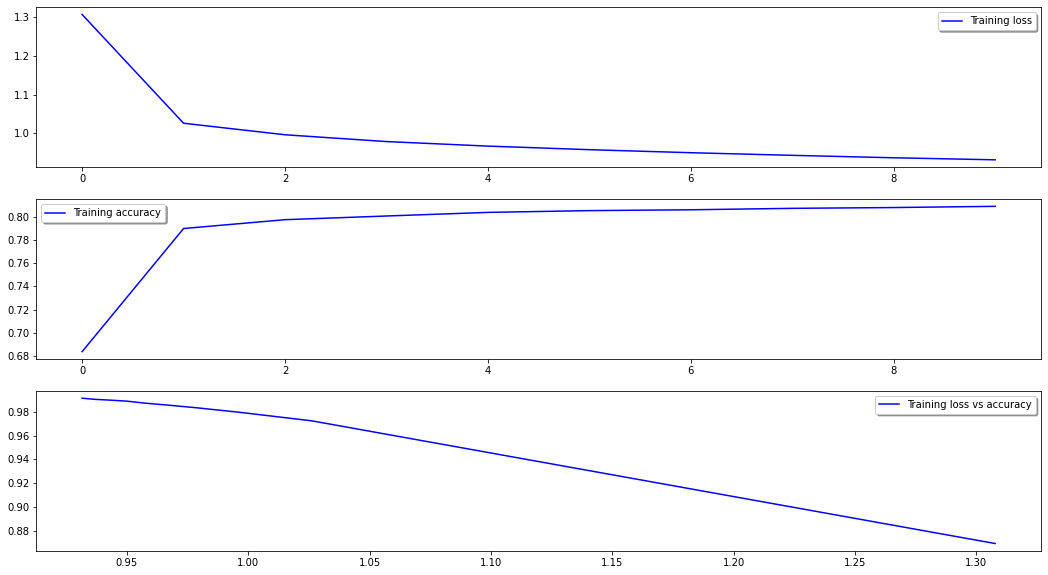

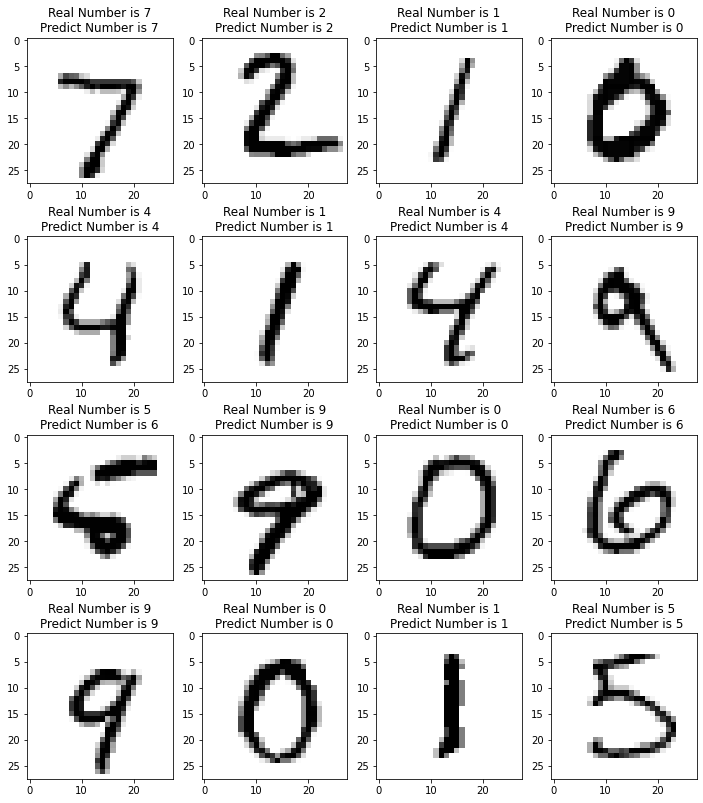

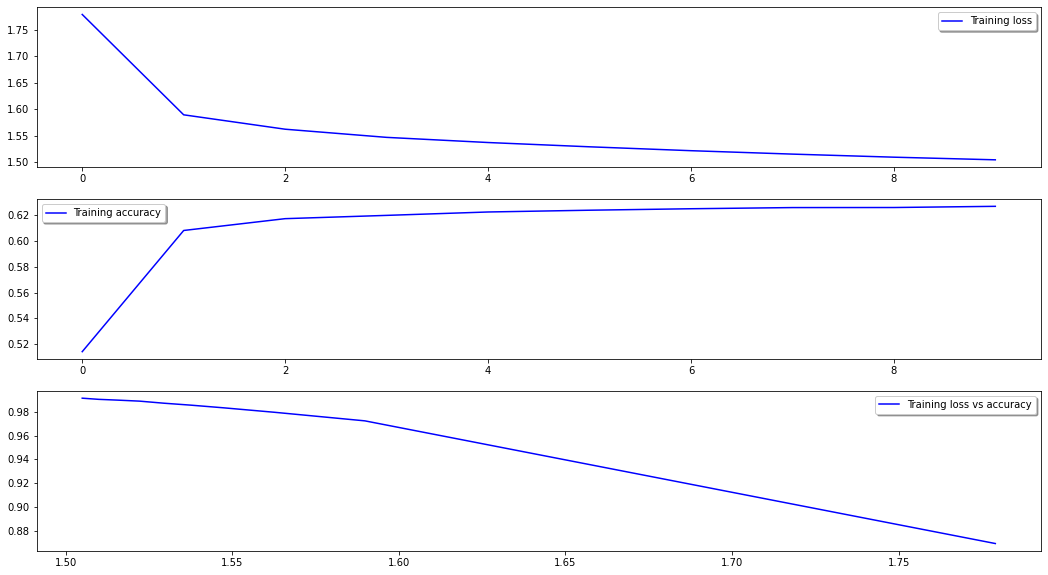

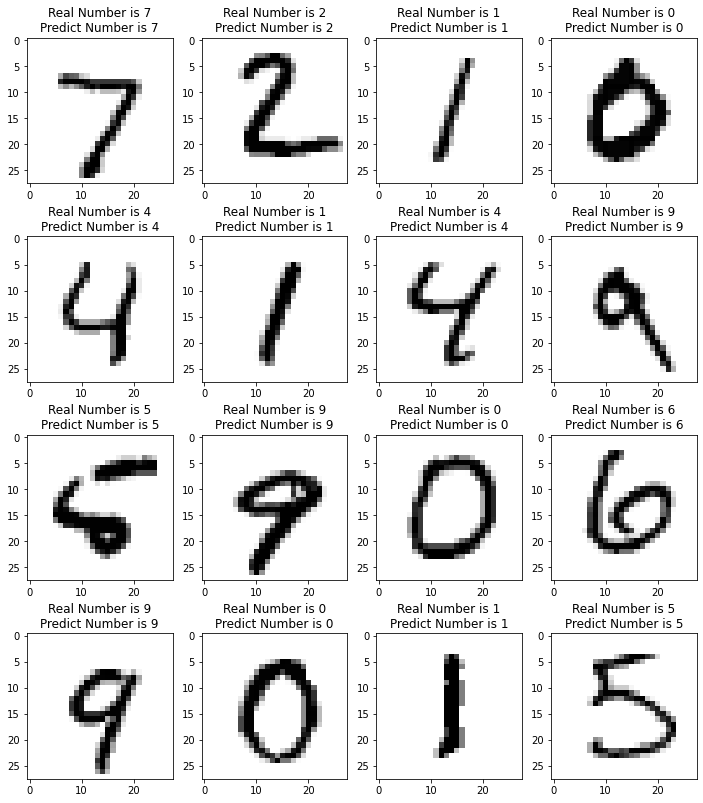

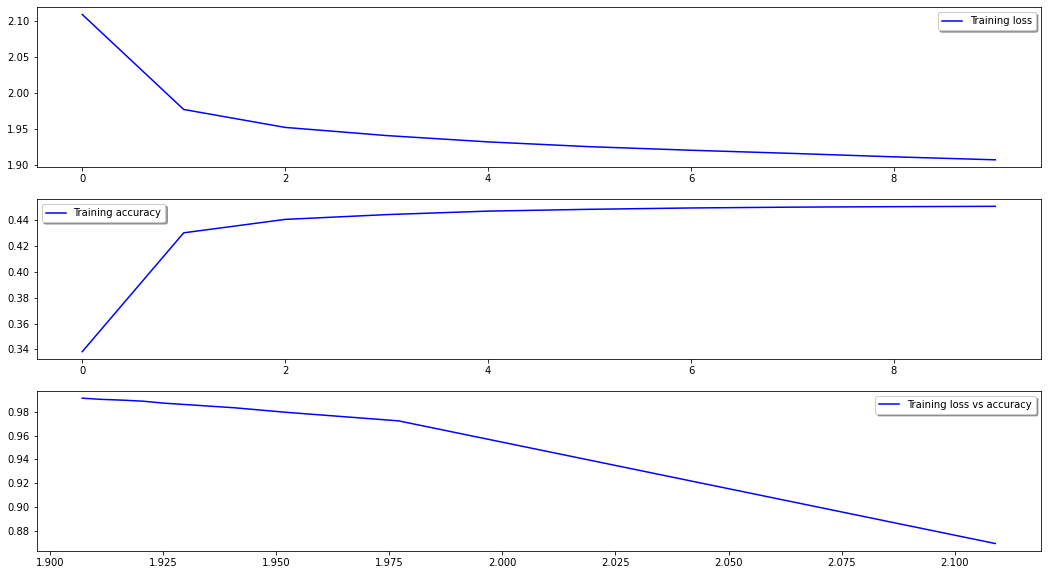

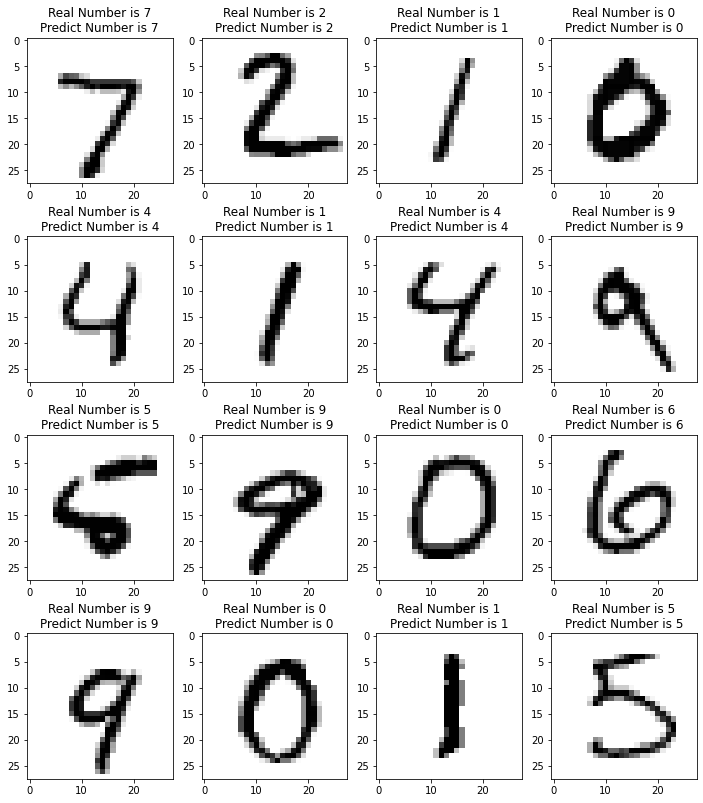

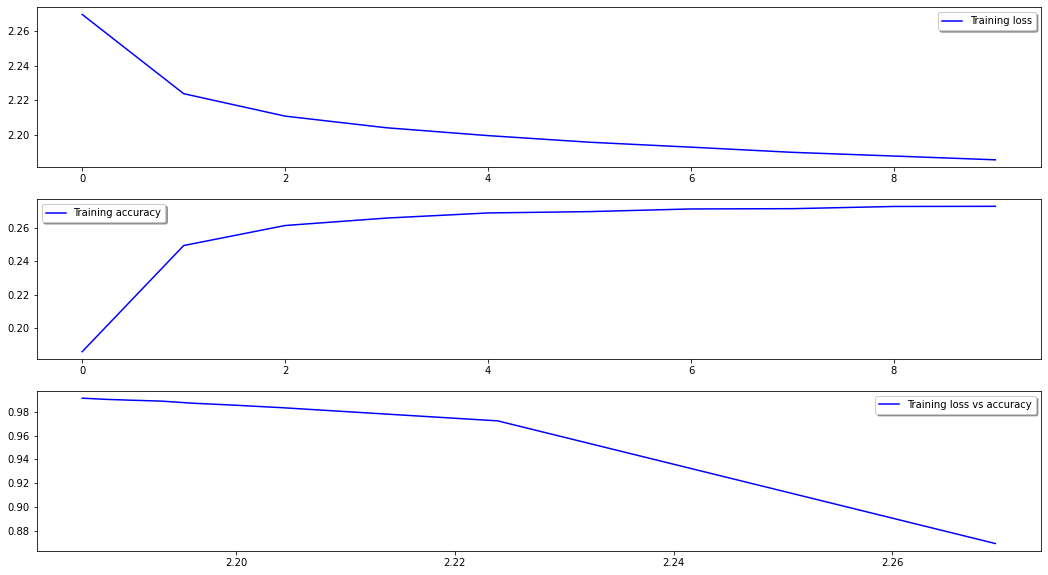

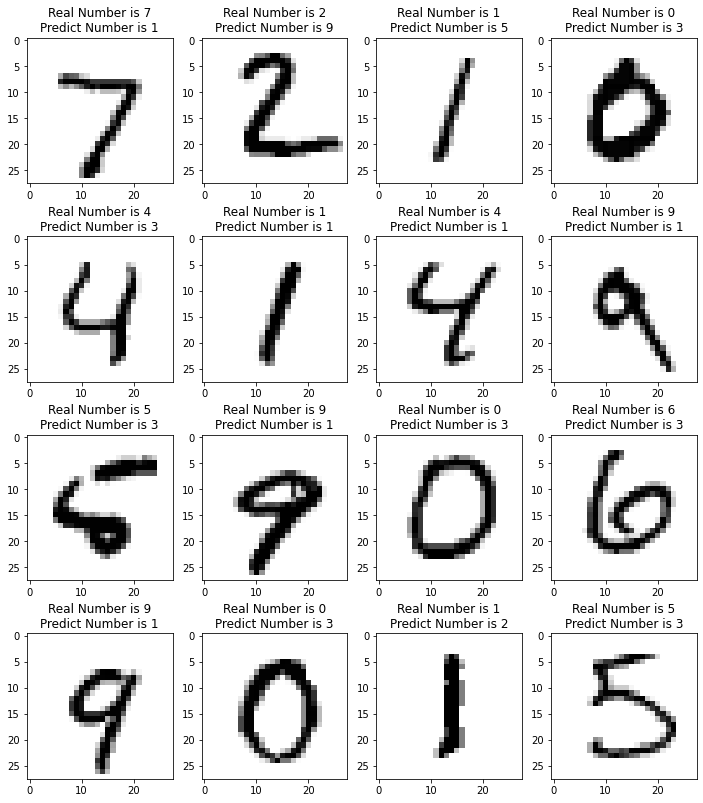

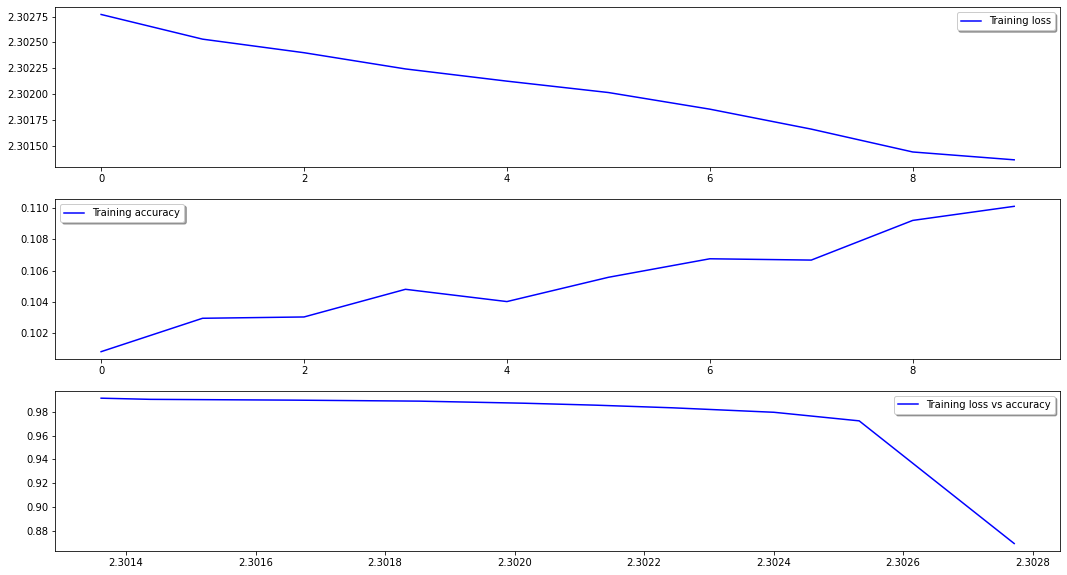

In [ ]:
result_loss = []
result_accuracy = []
for ratio in random_ratios:
  solve(ratio, result_loss, result_accuracy)

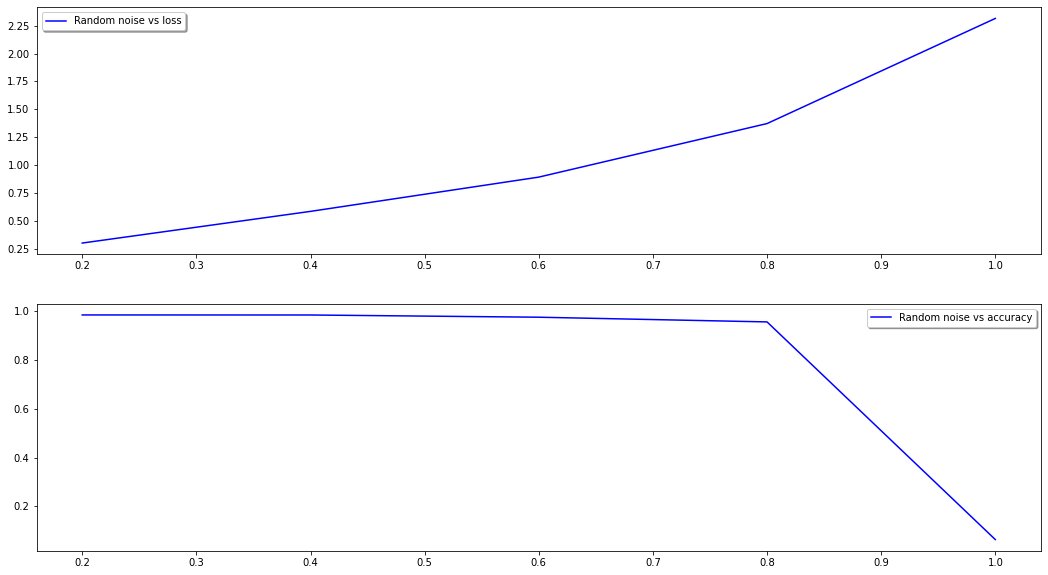

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(random_ratios, result_loss, color='b', label="Random noise vs loss")
# ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(random_ratios, result_accuracy, color='b', label="Random noise vs accuracy")
# ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)